# QA CA-2 Extra Experiment

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Load the Dataset

In [3]:
# Load dataset
data = pd.read_csv("milk_test.csv")  

# Display first few rows
print(data.head())


    pH  Temperature  Taste  Odor  Fat  Turbidity  Colour   Grade
0  6.6           35      1     0    1          0     254    high
1  6.6           36      0     1    0          1     253    high
2  8.5           70      1     1    1          1     246     low
3  9.5           34      1     1    0          1     255     low
4  6.6           37      0     0    0          0     255  medium


## Data Preprocessing

### Check missing values

In [4]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64


### Handle missing Values 

#### There are no missing values

### Encode the Grade column to numeric Values

In [6]:
# Encoding Grade: low=0, medium=1, high=2
grade_mapping = {'low': 0, 'medium': 1, 'high': 2}
data['Grade_encoded'] = data['Grade'].map(grade_mapping)

# Verify Encoding
print(data[['Grade', 'Grade_encoded']].head())


    Grade  Grade_encoded
0    high              2
1    high              2
2     low              0
3     low              0
4  medium              1


### Drop the original Grade column

In [7]:
# Drop the original categorical column
data.drop(columns=['Grade'], inplace=True)


## Exploratory Data Analysis

### Summary statistics

In [8]:
# Descriptive statistics
print(data.describe())


                pH  Temperature        Taste         Odor          Fat  \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  Grade_encoded  
count  1059.000000  1059.000000    1059.000000  
mean      0.491029   251.840415       0.836638  
std       0.500156     4.307424       0.787868  
min       0.000000   240.000000       0.000000  
25%       0.000000   250.000000       0.000000  
50%       0.000000   255.000000       1

### Correlation Heatmap

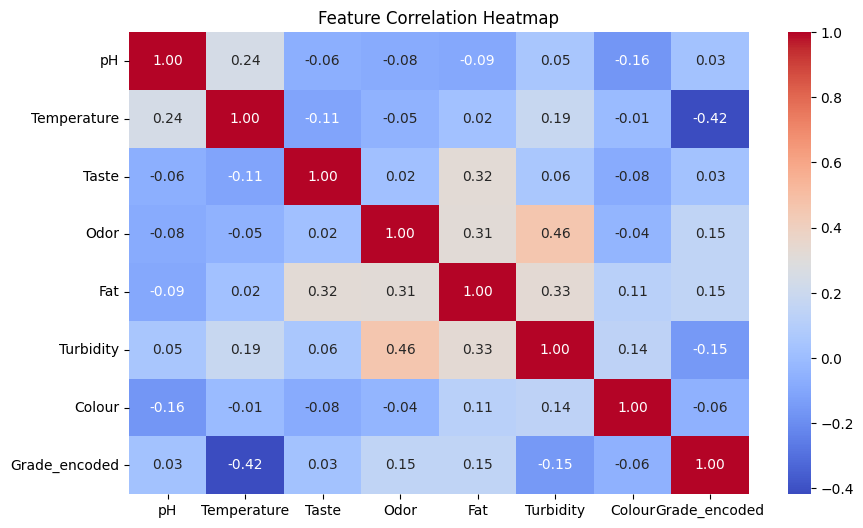

In [9]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Histogram of Features

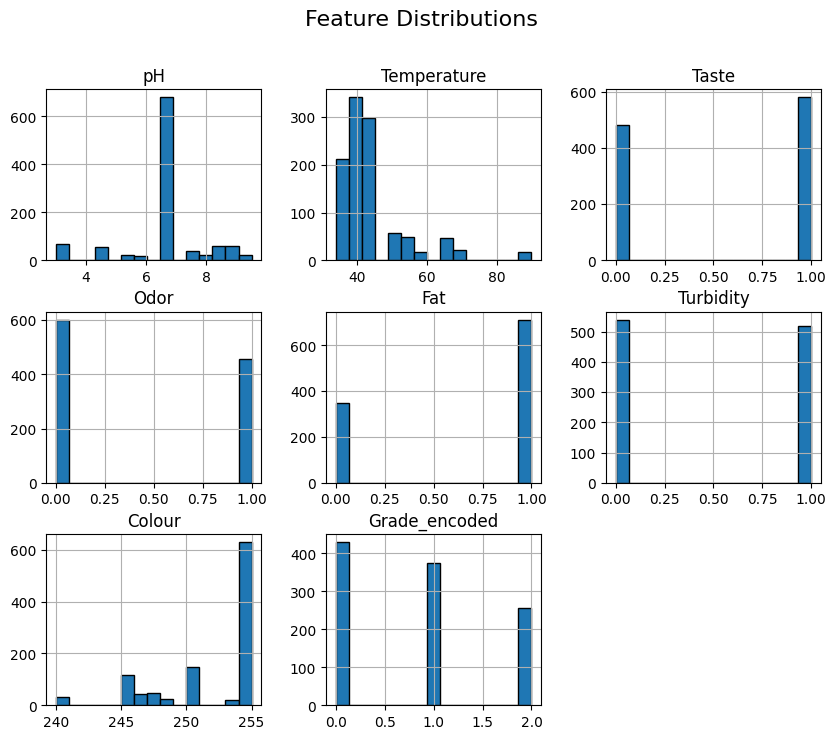

In [10]:
# Plot histograms
data.hist(figsize=(10, 8), bins=15, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


### Box Plots for outlier detection

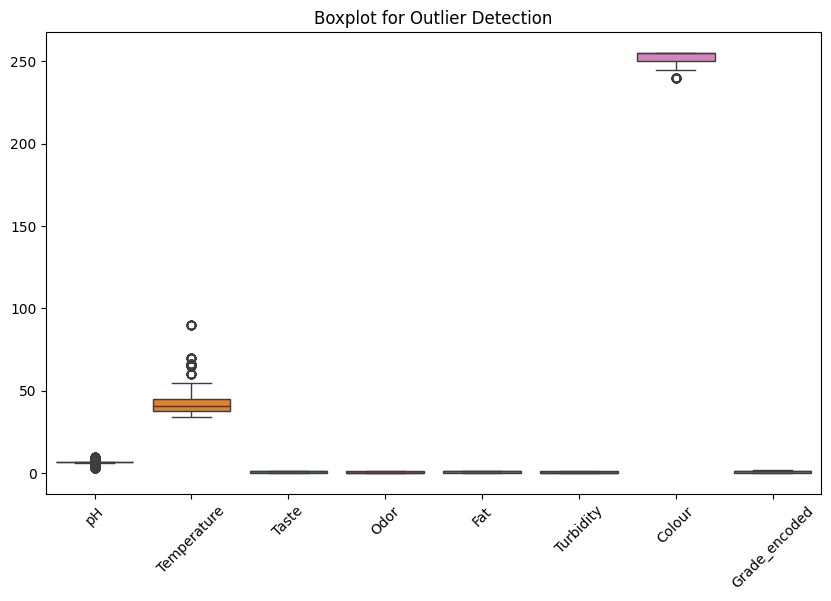

In [11]:
# Boxplot to detect outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


## Correlation Analysis

### Get correlation

In [12]:
# Get correlations with encoded grade
grade_corr = data.corr()['Grade_encoded'].sort_values(ascending=False)
print("Correlation of Features with Encoded Grade:\n", grade_corr)


Correlation of Features with Encoded Grade:
 Grade_encoded    1.000000
Fat              0.151002
Odor             0.149626
pH               0.028980
Taste            0.025500
Colour          -0.056986
Turbidity       -0.153634
Temperature     -0.417789
Name: Grade_encoded, dtype: float64


### Correlation heatmap

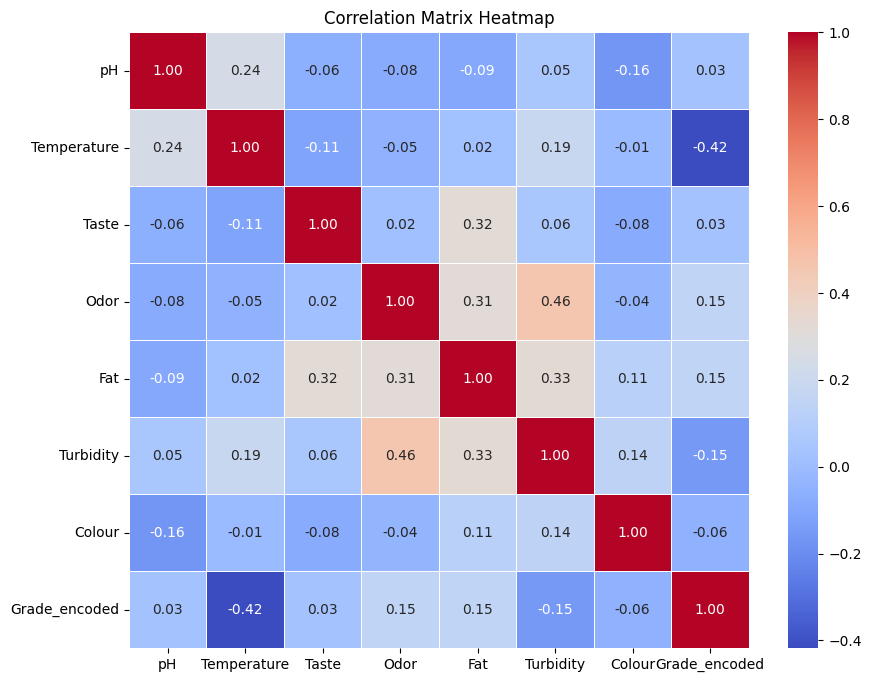

In [13]:
# Compute the correlation matrix for the entire dataset
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title and display the plot
plt.title("Correlation Matrix Heatmap")
plt.show()


## Linear Regression Model

### Define Independent (X) and Dependent (y) Variables

In [14]:
# Selecting features based on correlation
features = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
X = data[features]  # Independent variables
y = data['Grade_encoded']  # Dependent variable


### Split Data into Training and Testing Sets

In [15]:
# Splitting dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Linear Regression Model

In [16]:
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Regression Coefficients: [ 0.10212044 -0.03424627 -0.08775978  0.351077    0.33285084 -0.39802631
 -0.00574636]
Intercept: 2.9759361358238214


## Model Evaluation

### Make Predictions

In [17]:
# Make predictions
y_pred = model.predict(X_test)


### Compute Performance Metrics

In [18]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.44728562340981093
R-squared (R²): 0.22118374947580421


## Data Visualization for Regression

### Scatter Plot with Regression Line

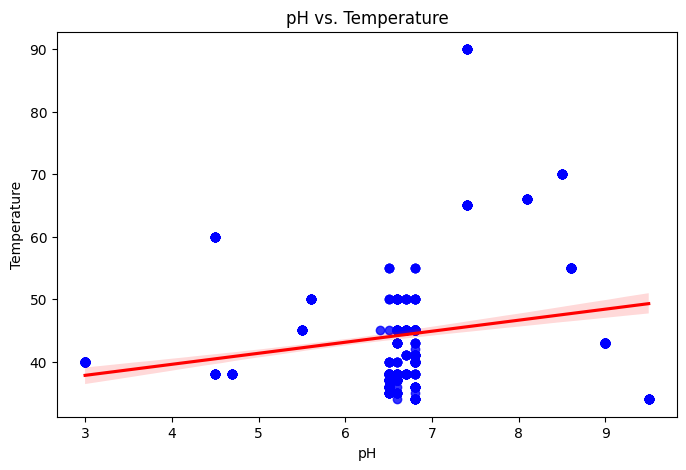

In [25]:
# Example: Temperature vs. Encoded Grade
plt.figure(figsize=(8,5))
sns.regplot(x=data['pH'], y=data['Temperature'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("pH vs. Temperature")
plt.xlabel("pH")
plt.ylabel("Temperature")
plt.show()


### Residual Plot

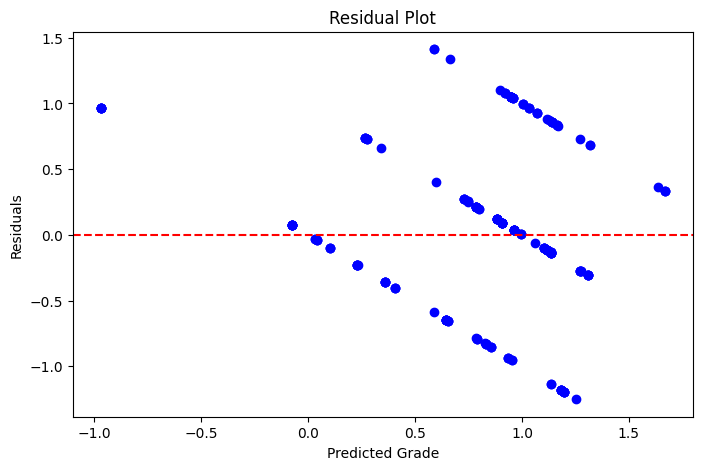

In [26]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Grade")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### Pie chart by milk grade

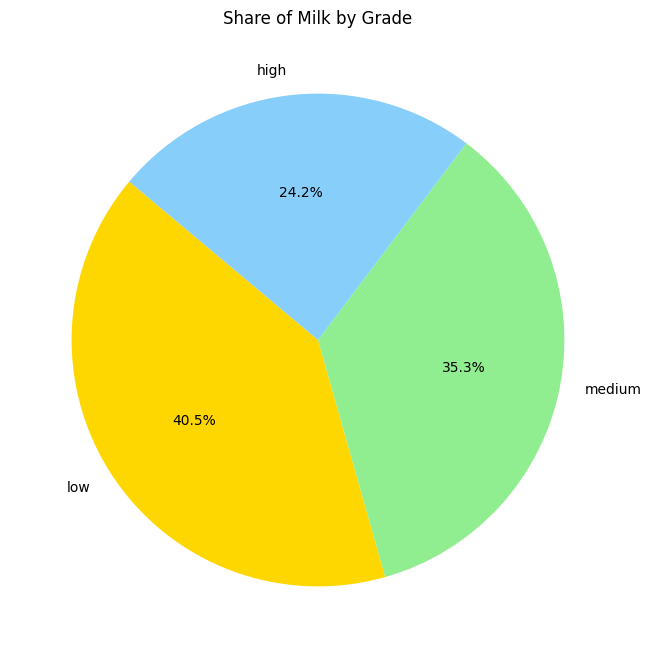

In [ ]:
import matplotlib.pyplot as plt

# If you have the original 'Grade' column, use it directly:
grade_counts = data['Grade_encoded'].value_counts().sort_index()

# Map numerical grades back to original labels for clarity:
grade_names = {0: 'Low', 1: 'Medium', 2: 'High'}
grade_labels = [grade_names.get(x) for x in grade_counts.index]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_labels, autopct='%1.1f%%', startangle=140, 
        colors=['gold', 'lightgreen', 'lightskyblue'])
plt.title("Share of Milk by Grade")
plt.show()


# Conclusions